<h1 align="center">Extrair Vértices de Memorial Descritivo</h1>

O objetivo deste _notebook_ é demonstrar a extração de coordenadas geodésicas referente a um memorial descritivo da Unidade de Manejo Florestal 4, localizada na Floresta Nacional de Amapá. O arquivo está disponível neste [link](https://www.gov.br/agricultura/pt-br/assuntos/servico-florestal-brasileiro/concessao-florestal/concessoes-florestais-em-andamento-1/ContratoConcesso012021.pdf).

Utilizaremos o módulo `pdfminer.high_level` do pacote `pdfminer`.

In [2]:
# Carregar o módulo extract_text do pacote pdfminer
from pdfminer.high_level import extract_text

### Ler como texto texto apenas as páginas 26, 27 e 28 do arquivo pdf 

In [3]:
# Ler páginas 26, 27 e 28
pdf_txt = extract_text('./ContratoConcesso012021_umf1_flonas_amapa.pdf', page_numbers=[26, 27, 28])

### Mostrar o conteúdo das páginas selecionadas

In [4]:
# Mostrar o conteúdo das páginas
print(pdf_txt)

Unidade de Manejo Florestal (UMF) IV 

Área Plana: 39.356,25 ha 

Perímetro: 125.469,24 m 

Municípios: Ferreira Gomes/AP 

O limite da UMF IV foi definido seguindo orientações da equipe da Gerência Executiva 
de  Monitoramento  e  Auditoria  Florestal  (GEMAF),  utilizando  como  referência  a 
hidrografia  da  Base  Continua  1:250.000  (Bc250)  versão  2017,  da  Coordenação  de 
Cartografia da Diretoria de Geociências (DGC) do IBGE, Gerência de Bases Contínuas 
(GBC)  e  ainda  utilizando  imagens  de  Modelo  digital  de  Superfície  SRTM  de  30m  da 
USGS.  O  Perímetro  forma  um  polígono  irregular  de  22  vértices.  Inicia-se  a  descrição 
deste perímetro no vértice   P-01, de coordenadas  N 140.443,12m e  E 410.769,20m, 
localizado  na  margem  esquerda  do  Rio  Santo  Antônio;  daí,  segue  a  montante  pelos 
meandros do igarapé sem nome por aproximadamente e distância de 4.991,2m até o ponto   
P-02, de coordenadas   N 139.245,91m e  E 415.407,42m, localizado na marge

### Capturando Padrões
Utilizaremos expressões regulares (regex) para extração das informações de interesse, a saber: Código de cada vértice, coordenadas geodésicas UTM referente ao leste e norte.
Ao observamos o memorial descritivo acima percebemos que há um padrão definido para os códicos dos vértices, cada um inicia com a letra maiúscula `P` seguida de um hífen e de um número com dois dígitos, por exemplo o primeiro vértice é denominado como `P-01`, o segundo com `P-02` o terceiro como `P-03` e assim por diante até o vértice `P-29`.
A expressão regular a seguir captura todos os vértices disponíveis no memorial descritivo:

In [5]:
# importar o pacote "re" para usar com regex
import re

# Regex para extração dos nomes dos vértices
vert = re.findall("[A-Z]+-\s*?\d{2}", pdf_txt)
print(vert)

['P-01', 'P-02', 'P-03', 'P-04', 'P-05', 'P-06', 'P-07', 'P-08', 'P-09', 'P-10', 'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-\n16', 'P-17', 'P-18', 'P-19', 'P-20', 'P-21', 'P-\n22', 'P-01', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29', 'P-23']


In [6]:
vert = []

for i in range(1, 10):
    vert.append('P-0'+str(i))
    
for i in range(10, 30):
    vert.append('P-'+str(i))

In [7]:
print(vert)
print()
print(len(vert))

['P-01', 'P-02', 'P-03', 'P-04', 'P-05', 'P-06', 'P-07', 'P-08', 'P-09', 'P-10', 'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-16', 'P-17', 'P-18', 'P-19', 'P-20', 'P-21', 'P-22', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29']

29


Agora resta capturar o padrão das coordenadas UTM Leste e Norte. Pelo fato da área do memorial descritvo está localizada no hemisfério norte, mais precisamente no município de Ferreira Gomes, esatado do Amapá, ambas coordenadas apresentam-se com o mesmo número de dígitos. Em termos de padrão textual a coordenada norte sempre inicia com a letra maiúscula "N", 3 dígitos seguidos de um ponto, mais 3 dígitos, uma vígula e por fim dois dígitos e a letra minúscula "m", a exemplo da coordenada norte referente ao vértice P-29, N 118.764,82m. A coordenada leste possui o mesmo padrão com a diferença que sempre inicia com a letra maiúscula E, E 409.323,92m. De posse de tal padrão podemos aplicar uma expressão regular para extrair estas coordenadas.

In [8]:
norte = re.findall(r'\bN\s*?(\d{3}\.\d{3},\d{2})m\b', pdf_txt)

# converter para formato numérico
from babel.numbers import parse_decimal

norte = [parse_decimal(i, locale='pt_BR') for i in norte]
    
print(norte)
print(len(norte))

[Decimal('140443.12'), Decimal('139245.91'), Decimal('137260.28'), Decimal('138132.31'), Decimal('130563.09'), Decimal('131013.35'), Decimal('130950.90'), Decimal('130796.93'), Decimal('126064.02'), Decimal('125490.99'), Decimal('123506.24'), Decimal('124133.18'), Decimal('122731.73'), Decimal('122740.51'), Decimal('122286.80'), Decimal('114544.32'), Decimal('111841.13'), Decimal('109808.42'), Decimal('115818.01'), Decimal('117729.48'), Decimal('120389.80'), Decimal('120672.98'), Decimal('119583.44'), Decimal('119194.17'), Decimal('117796.60'), Decimal('117196.36'), Decimal('117364.55'), Decimal('117996.66'), Decimal('118764.82')]
29


In [9]:
leste = re.findall(r'\bE\s*?(\d{3}\.\d{3},\d{2})m\b', pdf_txt)

leste = [parse_decimal(i, locale='pt_BR') for i in leste]

print(leste)
print(len(leste))

[Decimal('410769.20'), Decimal('415407.42'), Decimal('416613.41'), Decimal('418765.81'), Decimal('423378.13'), Decimal('423560.87'), Decimal('428236.94'), Decimal('428294.17'), Decimal('426838.05'), Decimal('424926.37'), Decimal('423091.73'), Decimal('422056.57'), Decimal('419643.04'), Decimal('417505.46'), Decimal('416776.58'), Decimal('411181.91'), Decimal('412251.32'), Decimal('412385.57'), Decimal('399342.22'), Decimal('400652.90'), Decimal('400773.23'), Decimal('400212.53'), Decimal('410879.79'), Decimal('411683.91'), Decimal('411459.00'), Decimal('410688.84'), Decimal('409757.15'), Decimal('409403.14'), Decimal('409323.92')]
29


### Gerar um dataframe e Salvar os dados

In [10]:
import pandas as pd

# Gerar um dataframe
df = pd.DataFrame({
    'vertice': vert,
    'leste': leste,
    'norte': norte
})

# Ler os dados
display(df.head())

,vertice,leste,norte
0,P-01,410769.20,140443.12
1,P-02,415407.42,139245.91
2,P-03,416613.41,137260.28
3,P-04,418765.81,138132.31
4,P-05,423378.13,130563.09


In [11]:
df.to_csv('vertices.csv', index=False)
df.to_excel('vertices.xlsx', index=False)

### Visualizar os dados

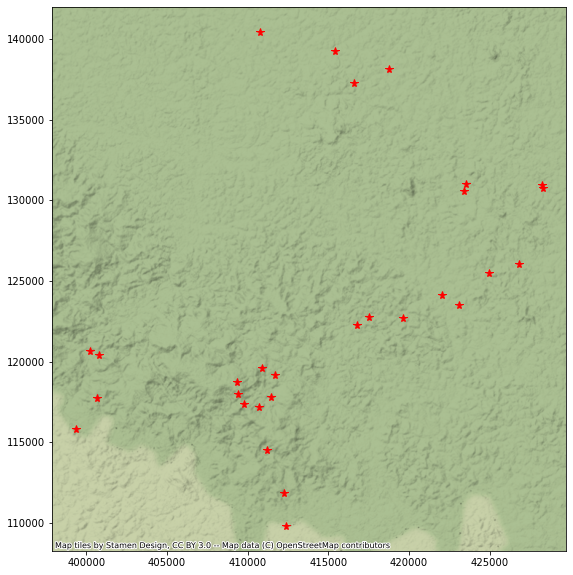

In [23]:
# importar pacotes
import matplotlib.pyplot as plt
import contextily

# Configurar o tamanho do mapa
plt.rcParams['figure.figsize'] = [15, 10]

# gerar o mapa
fig, map = plt.subplots()
map.plot(df['leste'], df['norte'], '*', color='red', markersize=8)
contextily.add_basemap(map, crs='EPSG:31976')
plt.show()